# Exploratory Data Analysis:
EDA is an approach to analyze data in order to:
- summarize main characteristics of the data
- gain better understanding of the dataset,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [21]:
df = pd.read_csv("clean_df.csv")
df.drop("city-mpg", axis=1, inplace=True)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,8.703704,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,8.703704,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,9.038462,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,7.833333,13950.0,9.791667,Low,0,1
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,10.681818,17450.0,13.055556,Low,0,1


## Descriptive Statistics:
Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the sample and measures of the data. One way in which we can do this is by using `describe()`.

In [22]:
df.describe() # Any NaN values are automatically skipped in these statistics. 

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,8.044957,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,1.840739,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.351852,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,6.911765,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,7.833333,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,9.400000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,14.687500,45400.000000,18.076923,1.000000,1.000000


To analyse the categorical variables, we can use `value_counts()`.

In [23]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

To print the categories of all the "object" dtype columns:

In [24]:
dtypeDict = dict(df.dtypes)
for k,v in dtypeDict.items():
    if (np.issubdtype(v.type,np.object_)):
        print(k + ":")
        print(df[k].value_counts())
        print("\n")

make:
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64


num-of-doors:
four    115
two      86
Name: num-of-doors, dtype: int64


body-style:
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


drive-wheels:
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


engine-location:
front    198
rear       3
Name: engine-location, dtype: int64


engine-type:
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64


num-of-cylinders:
four      157

## Boxplots:
Boxplots are a great way to visualize numeric data, since you can visualize the various distributions of the data.
The main features that the boxplot shows are:
- Median of the data, which represents where the middle datapoint is. 
- Upper Quartile shows where the 75th percentile is
- Lower Quartile shows where the 25th percentile is
- The data between the Upper and Lower Quartile represents the Interquartile Range.
- The Lower and Upper Extremes are calculated as 1.5 times the interquartile range above the 75th percentile, and as  1.5 times the IQR below the 25th percentile. 
- Outliers are displayed as individual dots that occur outside the upper and lower extremes. 

With boxplots, you can easily spot outliers and also see the distribution and skewness of the data.
Boxplots make it easy to compare between groups. 

## Scatter plots
Scatter plots help in observing the relation between the continuous variables.
It shows the relationship between two variables:
- The predictor variable: is the variable that you are using to predict an outcome.
- The target variable: is the variable that you are trying to predict.

## Grouping data:
We can use the `groupby()` method to group the data based on a categorical variable.
- Can be applied on categorical variable.
- Group the data into subsets according to the different categories of that variable.
- Can group by a single variable or you can group by multiple variables by passing in multiple variable names.

To group the data, we first extract the columns that we want to group and analyse.

In [25]:
dfTest = df[["drive-wheels", "body-style", "price"]]
dfTest.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [26]:
dfGrp = dfTest.groupby(["drive-wheels", "body-style"], as_index=False).mean()
dfGrp.head()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000


This groups the data by the specified columns and then finds the mean of the remaining column values.

But this data table is hard to understand from. So we can create a **pivot table**, that has some of the columns along the rows
and some along the columns. 

In [27]:
dfPivot = dfGrp.pivot(index="drive-wheels", columns="body-style")
dfPivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Another way to represent the pivot table is using a **heatmap plot**.
Heat map takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.
It is a great way to plot the target variable over multiple variables and through this get visual clues of the 
relationship between these variables and the target. 

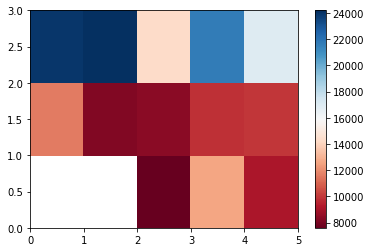

In [28]:
plt.pcolor(dfPivot, cmap="RdBu") # We specified the Red-blue color scheme.
plt.colorbar()
plt.show()

## ANOVA
ANOVA is a statistical test that stands for "Analysis of Variance". ANOVA can be used to find the correlation between different groups of a categorical variable.
According to the car dataset, we can use ANOVA to see if there is any difference in mean price for the different car makes such as Subaru and Honda.

The ANOVA test returns two values: the F-test score and the p-value. The F-test score calculates the ratio of variation between the groups's mean over the variatio within each of the sample groups. The p-value shows whether the obtained result is statistically significant.

In [29]:
# To perform an ANOVA between "Honda" and "Subaru"
dfAnova = df[["make","price"]]
dfAnova.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


In [30]:
grpAnova = dfAnova.groupby(["make"]) # Notice we don't take the mean of the price. We just group the data together.
grpAnova.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
190,volvo,12940.0
191,volvo,13415.0
192,volvo,15985.0
193,volvo,16515.0


In [31]:
resultsAnova1 = stats.f_oneway(grpAnova.get_group("honda")["price"], grpAnova.get_group("subaru")["price"])
print(resultsAnova1)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


The results say that: The prices between Hondas and Subarus are not significantly different, as the F-test score < 1 and p-value > 0.05.

In [32]:
resultsAnova2 = stats.f_oneway(grpAnova.get_group("honda")["price"], grpAnova.get_group("jaguar")["price"])
print(resultsAnova2) 

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


All in all, we can say that there is a strong correlation between a categorical variable and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

## Correlation:
Correlation is a statistical metric for measuring to what extent different variables are interdependent. In other words, when we look at two variables over time, if one variable changes how does this affect change in the other variable?

It is important to know that correlation doesn't imply causation. We can visualize the correlation between two variables using a scatter plot and an added linear line called a regression line.

(0, 53369.821656508684)

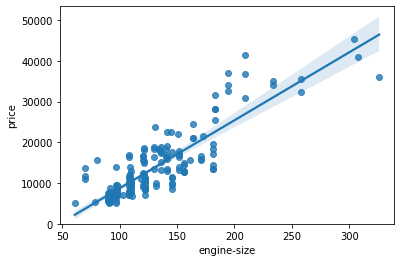

In [33]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

We can see that the straight line through the data points is very steep which shows that there's a positive linear relationship between the two variables. With increase in values of engine size, values of price go up as well and the slope of the line is positive. So there is a positive correlation between engine size and price.

(0, 47414.11669426048)

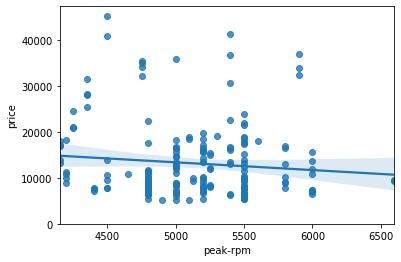

In [34]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

This shows there is no correlation between the peak-rpm and prices

## Correlation Statistics:
One way to measure the strength of the correlation between continuous numerical variable is by using a method called **Pearson correlation**. Pearson correlation method will give you two values: the correlation coefficient and the P-value.

Correlation coeff:
- close to +1: Large +ve relationship
- close to -1: Large -ve relationship
- close to 0: No relationship

p-value:
- p < 0.001: Strong certainity in result
- p < 0.05: Moderate certainity in result
- p < 0.1: Weak certainity in result
- p > 0.1: No certainity in result

Therefore, we can say that there is a strong correlation when the correlation coefficient is close to 1 or negative 1, and the P-value < 0.001.

In [35]:
# To calculate the Pearson correlation:
corCoe, pValue = stats.pearsonr(df["horsepower"], df["price"])
print(corCoe)
print(pValue)

0.8096068016571054
6.273536270650504e-48


We can see that the correlation coefficient is approximately 0.8, and this is close to 1. So there is a strong positive correlation. We can also see that the P-value is very small, much smaller than.001. And so we can conclude that we are certain about the strong positive correlation.